Ian Soede, Nicolas Salvan

# Control theory and Vicsek Model 

## Introduction

---
In this file, you will find data visualisation of different simulations. 

## Library import

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import pandas as pd



In [2]:
# Import models 
import models.vicsek as vicsek

import utils
import animation.Animator2D as Animator2D
import animation.MatplotlibAnimator as MatplotlibAnimator

## 0. Lauching a simulation

In [3]:
# Initialize the Vicsek model.
simulator = vicsek.Vicsek(domainSize=(50,50), numberOfParticles=50)
# Simulate the Vicsek model.
simulationData = simulator.simulate()

# Extract the simulation data.
time, positions, orientations = simulationData[0], simulationData[1], simulationData[2]

In [4]:
print(time.shape)
print(positions.shape)
print(orientations.shape)

(1001,)
(1001, 50, 2)
(1001, 50, 2)


In [5]:
df = utils.simulationDataToDataframe(simulationData)

In [6]:
df.head()

,t,x0,y0,x1,y1,x2,y2,x3,y3,x4,...,theta_x_45,theta_y_45,theta_x_46,theta_y_46,theta_x_47,theta_y_47,theta_x_48,theta_y_48,theta_x_49,theta_y_49
0,0.0,27.367616,28.314111,16.238475,9.949706,14.532964,26.464576,28.649465,6.310226,22.694491,...,-0.382374,-0.924008,0.011338,-0.999936,0.685294,0.728267,0.964014,0.265851,-0.938671,0.344815
1,0.5,27.747370,27.988862,16.676790,9.709123,14.959092,26.726138,29.101687,6.523521,23.065166,...,-0.446879,-0.894594,0.168637,-0.985678,0.704270,0.709933,0.983030,0.183447,-0.982667,-0.185378
2,1.0,27.947581,27.530697,17.163885,9.596257,15.260288,27.125239,29.597335,6.457696,23.554504,...,-0.205905,-0.978572,-0.970741,0.240129,0.592391,0.805651,0.993747,-0.111658,-0.982902,-0.184132
3,1.5,28.283425,27.160279,17.567419,9.301029,15.554463,27.529542,30.088506,6.551244,23.999532,...,-0.883385,-0.468648,-0.987626,0.156824,0.564528,0.825414,0.975655,-0.219312,-1.000000,-0.000051
4,2.0,28.644235,26.814134,17.432261,8.819643,15.857989,27.926873,30.588086,6.530746,24.412846,...,-0.908024,-0.418918,-0.951678,0.307099,0.494904,0.868948,0.988586,-0.150657,-0.999999,0.001355


## Part 1 : Bird path 

### Bird position over time

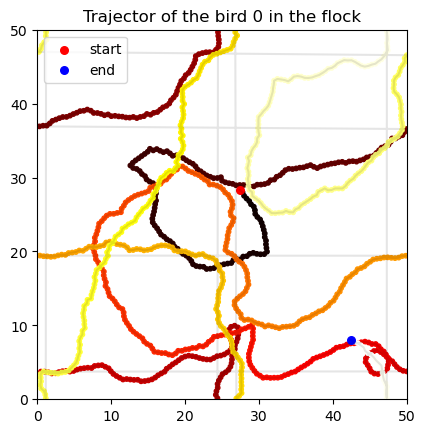

In [7]:
def plot_bird_path(df, i):

    """
    Plot the travelled path of the bird.
    """
    L = 50
    bird_x, bird_y = 'x'+str(i),'y'+str(i)
    x, y = df[[bird_x, bird_y]].to_numpy().transpose()
    fig, ax = plt.subplots()
    ax.scatter(x, y, s=10, 
             c=np.arange(len(x)), cmap='hot') 
    ax.scatter(x[0], y[0], s=30, 
             c='red', label='start') #startpoint
    ax.scatter(x[-1], y[-1], s=30, 
             c='blue', label='end') #endpoints
    ax.set_title(f'Trajector of the bird {i} in the flock')
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    ax.set_aspect(True)
    ax.plot(x, y, c='k', alpha=0.1)
    ax.legend()
    plt.show()
plot_bird_path(df, 0)

### Bird orientation over time 

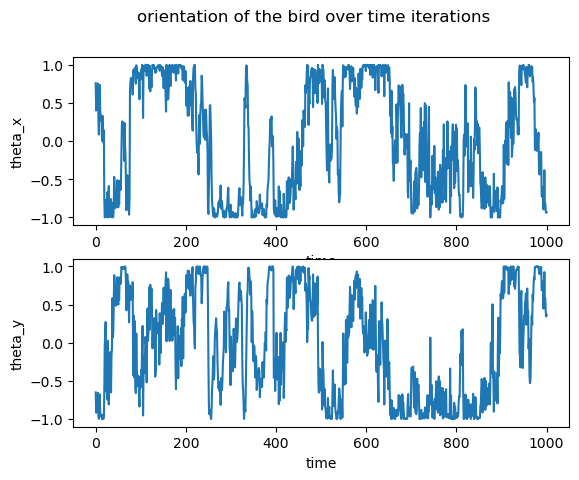

In [8]:
def plot_bird_orientation(df, i):

    """
    Plot the travelled path of the bird.
    """
    L = 0
    bird_x, bird_y = 'theta_x_'+str(i), 'theta_y_'+str(i)
    x, y = df[[bird_x, bird_y]].to_numpy().transpose()
    fig, axs = plt.subplots(2)
    fig.suptitle('orientation of the bird over time iterations')
    axs[0].plot(x, label="theta_x")
    axs[1].plot(y, label="theta_y")
    axs[0].set(xlabel="time", ylabel="theta_x")
    axs[1].set(xlabel="time", ylabel="theta_y")
    plt.show()
plot_bird_orientation(df, 0)

### Phase portrait of orientation 

In [9]:
# TODO 

### Highlight a bird in a video, trajectory in the video 

In [10]:
## TODO but seems useless so I'll do it last

## 2. Controller plots

In [11]:
## TO DO 

## 3. Plot the simulation at some time 

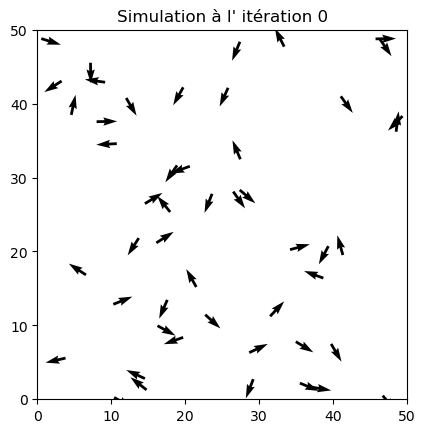

In [13]:
def plot_simulation(df, i, dt):

    """
    Plot the travelled path of the bird.
    """
    L = 50
    x,y = 4,2
    df_pos = utils.extract_positions_from_dataframe(df).iloc[i]
    df_orient = utils.extract_orientations_from_dataframe(df).iloc[i]

    n_bird = len(df_pos)//2
    
    list_pos = df_pos.to_numpy().reshape((n_bird, 2))
    list_orient = df_orient.to_numpy().reshape((n_bird, 2))

    x, y = list_pos[:,0], list_pos[:,1]
    theta_x, theta_y = list_orient[:,0], list_orient[:,1]

    fig, ax = plt.subplots()
    ax.quiver(x,y,theta_x,theta_y)
    ax.set_title(f'Simulation à l\' itération {i}')
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    ax.set_aspect(True)
    plt.show()

plot_simulation(df, 0, 0.5)

## 4. Average behaviour of the flock

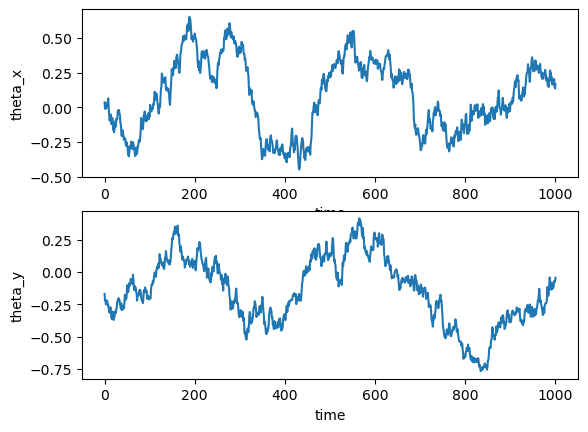

In [14]:
def plot_average_orientation(df):
    df_orient = utils.extract_orientations_from_dataframe(df)
    theta_x = df_orient.filter(like="theta_x").to_numpy()
    theta_y = df_orient.filter(like="theta_y").to_numpy()
    theta_x_mean = np.mean(theta_x, axis=1)
    theta_y_mean = np.mean(theta_y, axis=1)
    fig, axs = plt.subplots(2)
    axs[0].plot(theta_x_mean, label="theta_x")
    axs[1].plot(theta_y_mean, label="theta_y")
    axs[0].set(xlabel="time", ylabel="theta_x")
    axs[1].set(xlabel="time", ylabel="theta_y")
    plt.show()

plot_average_orientation(df)

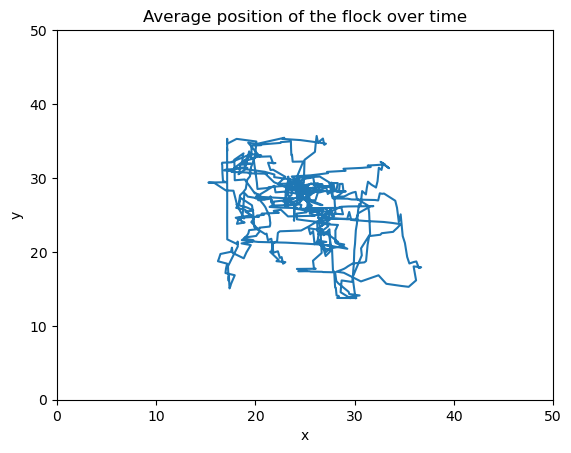

In [15]:
def plot_average_position(df):
    L = 50
    df_pos = utils.extract_positions_from_dataframe(df)
    x = df_pos.filter(like="x").to_numpy()
    y = df_pos.filter(like="y").to_numpy()
    x_mean = np.mean(x, axis=1)
    y_mean = np.mean(y, axis=1)
    fig, ax = plt.subplots()
    ax.plot(x_mean, y_mean)
    ax.set_title('Average position of the flock over time')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    plt.show()

plot_average_position(df)


## Order factor and other coefficients 

In [35]:
import scipy.integrate as spi

Signature: spi.simpson(y, x=None, dx=1.0, axis=-1, even='avg')
Docstring:
Integrate y(x) using samples along the given axis and the composite
Simpson's rule. If x is None, spacing of dx is assumed.

If there are an even number of samples, N, then there are an odd
number of intervals (N-1), but Simpson's rule requires an even number
of intervals. The parameter 'even' controls how this is handled.

Parameters
----------
y : array_like
    Array to be integrated.
x : array_like, optional
    If given, the points at which `y` is sampled.
dx : float, optional
    Spacing of integration points along axis of `x`. Only used when
    `x` is None. Default is 1.
axis : int, optional
    Axis along which to integrate. Default is the last axis.
even : str {'avg', 'first', 'last'}, optional
    'avg' : Average two results:1) use the first N-2 intervals with
              a trapezoidal rule on the last interval and 2) use the last
              N-2 intervals with a trapezoidal rule on the first inter

In [60]:
def order_factor(df):
    df_orient = utils.extract_orientations_from_dataframe(df)

    
    df_orient['order_factor'] = np.sqrt(df_orient.filter(like="theta_x").mean(axis=1)**2 + df_orient.filter(like="theta_y").mean(axis=1)**2)
    return df_orient['order_factor']


def stationnary_order_factor(df):
    tmax = df['t'].iloc[-1]
    print(tmax)
    df_order = order_factor(df)
    order = df_order.to_numpy()
    x = np.linspace(0, tmax, len(order))
    int_order = spi.simpson(order, x=x) 
    return int_order/tmax


# TESTS 
stationnary_order_factor(df)


500.0


C:\Users\nicos\AppData\Local\Temp\ipykernel_43868\819816077.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orient['order_factor'] = np.sqrt(df_orient.filter(like="theta_x").mean(axis=1)**2 + df_orient.filter(like="theta_y").mean(axis=1)**2)


0.3761360483760793

C:\Users\nicos\AppData\Local\Temp\ipykernel_43868\1132667024.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orient['order_factor'] = np.sqrt(df_orient.filter(like="theta_x").mean(axis=1)**2 + df_orient.filter(like="theta_y").mean(axis=1)**2)


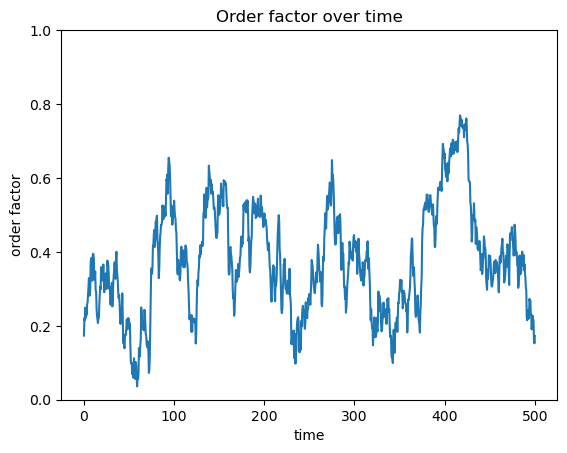

In [56]:

def plot_order_factor(df):
    df_order = order_factor(df)
    order = df_order.to_numpy()
    fig, ax = plt.subplots()
    ax.plot(df['t'], order)
    plt.title('Order factor over time')
    plt.xlabel('time')
    plt.ylabel('order factor')
    plt.ylim(0, 1)
    plt.show()
    

plot_order_factor(df)

